### DISCLAIMER!
*Before proceeding, please make sure that you note the following important information*:

*NOT FINANCIAL ADVICE!*

*My content is intended to be used and must be used for informational and educational purposes only*. 
*I am not an attorney, accountant, or financial advisor, nor am I holding myself out to be, and the information contained on this blog/notebook is not a substitute for financial advice None of the information contained here constitutes an offer (or solicitation of an offer) to buy or sell any security or financial instrument, to make any investment, or to participate in any particular trading strategy. Always seek advice from a professional who is aware of the facts and circumstances of your individual situation. Or, Independently research and verify any information that you find on my blog/notebook and wish to rely upon in making any investment decision or otherwise. I accept no liability whatsoever for any loss or damage you may incur*


In [1]:
#Importing all the relevant librabries and modules
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data as wb
from chart_studio import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

### Portfolio construction and analysis: 

In [2]:
# importing the data from yahoo finance and exploring the data
assets = ['TXN','CSCO','INTC','AAPL','MSFT',
          'NVDA','INFY','INTU','SAP','ADI',
          'ANSS','CRM','ADBE','FB','AMD',
          'AMZN','MA','VMW','GOOG','SNPS']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = yf.download(a, start="2012-05-20", end="2021-12-31", index_col = 'Date', parse_dates=True)['Adj Close'] 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
pf_data.head()

,TXN,CSCO,INTC,AAPL,MSFT,NVDA,INFY,INTU,SAP,ADI,ANSS,CRM,ADBE,FB,AMD,AMZN,MA,VMW,GOOG,SNPS
Date,,,,,,,,,,,,,,,,,,,,
2012-05-21,22.764721,12.278630,19.634386,17.164623,24.347107,2.821950,4.207326,50.348270,51.226322,28.219660,61.000000,37.262501,32.009998,34.029999,6.30,218.110001,38.773228,69.075218,305.908386,28.040001
2012-05-22,22.672050,12.322826,19.544291,17.032824,24.355293,2.787508,4.262771,51.022614,51.139191,28.164587,61.750000,37.362499,32.009998,31.000000,6.16,215.330002,39.043308,68.748138,299.278229,28.040001
2012-05-23,22.502163,12.293360,19.101295,17.448427,23.823338,2.856392,4.215075,51.460030,51.235039,28.070181,62.119999,37.652500,32.180000,32.000000,6.08,217.279999,39.388000,69.177422,303.592072,28.200001
2012-05-24,22.309116,12.072392,19.258968,17.288181,23.790604,2.780619,4.290594,51.387138,50.276562,28.321932,61.689999,36.552502,31.540001,33.029999,6.02,215.240005,39.646770,65.027603,300.702881,29.850000
2012-05-25,22.347729,12.028196,19.326548,17.195515,23.782415,2.847208,4.219050,51.441818,49.727615,28.471413,62.090000,36.750000,31.600000,31.910000,6.22,212.889999,39.092419,64.066803,294.660553,29.889999


In [4]:
#Check to see if there are any missing values
pf_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 2012-05-21 to 2021-12-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TXN     2420 non-null   float64
 1   CSCO    2420 non-null   float64
 2   INTC    2420 non-null   float64
 3   AAPL    2420 non-null   float64
 4   MSFT    2420 non-null   float64
 5   NVDA    2420 non-null   float64
 6   INFY    2420 non-null   float64
 7   INTU    2420 non-null   float64
 8   SAP     2420 non-null   float64
 9   ADI     2420 non-null   float64
 10  ANSS    2420 non-null   float64
 11  CRM     2420 non-null   float64
 12  ADBE    2420 non-null   float64
 13  FB      2420 non-null   float64
 14  AMD     2420 non-null   float64
 15  AMZN    2420 non-null   float64
 16  MA      2420 non-null   float64
 17  VMW     2420 non-null   float64
 18  GOOG    2420 non-null   float64
 19  SNPS    2420 non-null   float64
dtypes: float64(20)
memory usage: 397.0 KB


I’ll use a built-in method in DataFrame that computes the percent change from one row to another

In [5]:
#Calculate the daily returns of the stocks in the portfolio
returns = pf_data.pct_change(1).dropna()
returns

,TXN,CSCO,INTC,AAPL,MSFT,NVDA,INFY,INTU,SAP,ADI,ANSS,CRM,ADBE,FB,AMD,AMZN,MA,VMW,GOOG,SNPS
Date,,,,,,,,,,,,,,,,,,,,
2012-05-22,-0.004071,0.003599,-0.004589,-0.007679,0.000336,-0.012205,0.013178,0.013394,-0.001701,-0.001952,0.012295,0.002684,0.000000,-0.089039,-0.022222,-0.012746,0.006966,-0.004735,-0.021674,0.000000
2012-05-23,-0.007493,-0.002391,-0.022666,0.024400,-0.021841,0.024712,-0.011189,0.008573,0.001874,-0.003352,0.005992,0.007762,0.005311,0.032258,-0.012987,0.009056,0.008828,0.006244,0.014414,0.005706
2012-05-24,-0.008579,-0.017975,0.008255,-0.009184,-0.001374,-0.026527,0.017916,-0.001416,-0.018707,0.008969,-0.006922,-0.029214,-0.019888,0.032187,-0.009868,-0.009389,0.006570,-0.059988,-0.009517,0.058511
2012-05-25,0.001731,-0.003661,0.003509,-0.005360,-0.000344,0.023948,-0.016674,0.001064,-0.010919,0.005278,0.006484,0.005403,0.001902,-0.033909,0.033223,-0.010918,-0.013982,-0.014775,-0.020094,0.001340
2012-05-29,0.014513,0.015922,0.013597,0.017749,0.017206,0.025806,0.023316,0.003189,0.020151,0.019619,0.015623,-0.008912,0.014240,-0.096208,0.038585,0.008737,0.005049,0.009253,0.004750,0.009368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,0.002514,0.012189,0.006671,0.003644,0.004472,0.008163,0.008153,0.006412,0.004878,0.002148,0.007363,0.001345,0.010000,0.014495,0.015707,0.000184,0.008672,0.012912,0.001317,0.003618
2021-12-27,0.023693,0.018305,0.012278,0.022975,0.023186,0.044028,0.024262,0.026836,0.008638,0.016275,0.018905,0.020384,0.014150,0.032633,0.056247,-0.008178,-0.000749,-0.005219,0.006263,0.025782
2021-12-28,-0.003857,0.001734,-0.003466,-0.005767,-0.003504,-0.020133,-0.001184,-0.004580,0.001557,-0.006212,-0.003161,-0.011034,-0.014402,0.000116,-0.007839,0.005844,0.001304,0.010320,-0.010914,-0.009159


I expected the stocks in this portfolio to have a large number of positive correlations considering they are all part of the same sector in fact no pair is negatively correlated


The top 3 most correlated stocks are: 
Analog devices and Texas Instruments which have a strong positive correlation with 0.80 both companies are in the business of designing and fabrication of semiconductors and semiconductor devices which is a sub-industry of the overall technology sector, 

The other two sets of stocks have a moderate positive correlation which is Ansys Inc, and Synopsys inc with 0.69 and Synopsys inc again but this time with financial software company Intuit inc with 0.66


In [6]:
corr = returns.corr()
fig = px.imshow(corr)
fig.update_layout(width=1000, height=800)
fig.update_layout(template = "plotly_dark", title = 'The Correlation coefficient of the Assets in the Portfolio') 
fig.show()

In [7]:
corr.unstack().sort_values().drop_duplicates()

FB    AMD     0.234715
AMD   INFY    0.235012
FB    INFY    0.236786
INFY  AMZN    0.248298
VMW   AMD     0.264527
                ...   
MSFT  ADBE    0.662720
SNPS  INTU    0.672902
ANSS  SNPS    0.698040
ADI   TXN     0.803991
TXN   TXN     1.000000
Length: 191, dtype: float64

### Creating an equal weight (EW) portfolio:
Equal weight is a type of proportional measuring method that gives the same importance to each stock in a portfolio, index, or index fund. So stocks of the smallest companies are given equal statistical significance, or weight, to the largest companies when it comes to evaluating the overall group's performance.

In [8]:
#Equal weighted portfolio
N = len(returns.columns)
equal_weights = N * [1/N] # Shows 1/20, 20 times. Its not multiplication, but repetition! 20*["A"]
equal_weights

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05]

In [9]:
#Calculate portfolio daily return
portfolio_return = returns.dot(equal_weights)
portfolio_return

Date
2012-05-22   -0.006508
2012-05-23    0.003661
2012-05-24   -0.004807
2012-05-25   -0.002338
2012-05-29    0.008578
                ...   
2021-12-23    0.006743
2021-12-27    0.019035
2021-12-28   -0.004217
2021-12-29   -0.002838
2021-12-30   -0.004248
Length: 2419, dtype: float64

In [10]:
#Formatting the dates to column and not index
pf_data.index
dates = pf_data.index.to_frame().reset_index(drop=True)

The returns were noticeably volatile in 2018 November as that year a lot was happening like the federal reserve interest hike but the most notable event was a lot of the big tech were under scrutiny at the time and considering this is a tech portfolio the volatility shouldn’t be surprising

Another noticeable moment here is the pandemic in 2020, volatility was extremely high, in fact, On March 16, 2020, the VIX closed at a record high of 82.69 
The markets were tumbling and a lot of trades were being made, some were covering short positions while others buying “the dip” and last but not least you have countless algorithims and retail traders day trading and taking advantage of the high volatility 


In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates['Date'], y=portfolio_return,
                    mode='lines',
                    line=dict(color='firebrick',width=2),
                    name='lines'))
fig.update_layout(template = "plotly_dark")                    

In [12]:
#calculating the cummulative retrun of the equal weight portfolio
cum_equal_returns =   (1 + portfolio_return).cumprod() - 1
cum_equal_returns_perc = pd.Series(100 * cum_equal_returns)

The EW has done pretty well returning more than 1000%!

In [13]:
fig = go.Figure([go.Scatter(x=dates['Date'], y=cum_equal_returns_perc)])
fig.update_layout(template = "plotly_dark", title = 'Cummulative % Return') 
fig.show()

### Sharpe Ratio
In the next step i am going to calcluate sharpe ratio, but first we need the annual volatility, annual return and risk free rate

In [14]:
#Calculating the mean return and volatility
ER = portfolio_return.mean()
STD = portfolio_return.std()

In [15]:
#Annualzing the volatility
ASTD = STD * 252 ** 0.5
ASTD

0.21152540509753195

In [16]:
#Annualzing the expected return 
AER = ER * 252 
AER

0.27844167575017287

In [17]:
#Annual sharpe ratio
rf = 0.03 #risk free rate is the 10 year trasury bond as of april 2022
excess_return = AER - rf
SR = excess_return/ASTD
SR

1.1745240513101451

A Sharpe ratio of 1.17 is not the best but also considering that tech stocks are very volatile maybe there is a weight combination that would have a higher Sharpe ratio and/or lower volatility or even a higher expected return and that is what I’ll try to uncover in the next section

### Modern Portfolio Theory & Monte Carlo simulation:

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.

Modern portfolio theory refers to the quantitative practice of asset allocation that maximizes projected (ex ante) return for a portfolio while holding constant its overall exposure to risk. Or, inversely, minimizing overall risk for a given target portfolio return. The theory considers the covariance of constituent assets or asset classes within a portfolio, and the impact of an asset allocation change on the overall expected risk/return profile of the portfolio.  
The theory was originally proposed by nobel-winning economist Harry Markowitz in the 1952 Journal of Finance, and is now a cornerstone of portfolio management practice. Modern portfolio theory generally supports a practice of diversifying toward a mix of assets and asset classes with a low degree of mutual correlation.

Hence, I’m going to find the optimal portfolio using Monte Carlo simulations by building thousands of portfolios, using randomly assigned weights, and visualizing the results.


In [18]:
#Saving a variable which will have the number of stocks in my portfolio which i will use later
num_assets = len(pf_data.columns)
num_assets

20

In [19]:
#calculating the log returns of the stocks in the portfolio
log_returns = np.log(pf_data/pf_data.shift(1))
log_returns.head()

,TXN,CSCO,INTC,AAPL,MSFT,NVDA,INFY,INTU,SAP,ADI,ANSS,CRM,ADBE,FB,AMD,AMZN,MA,VMW,GOOG,SNPS
Date,,,,,,,,,,,,,,,,,,,,
2012-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-22,-0.004079,0.003593,-0.004599,-0.007708,0.000336,-0.012280,0.013092,0.013305,-0.001702,-0.001953,0.012220,0.002680,0.000000,-0.093255,-0.022473,-0.012828,0.006941,-0.004746,-0.021912,0.000000
2012-05-23,-0.007521,-0.002394,-0.022927,0.024107,-0.022084,0.024411,-0.011252,0.008536,0.001873,-0.003358,0.005974,0.007732,0.005297,0.031749,-0.013072,0.009015,0.008790,0.006225,0.014311,0.005690
2012-05-24,-0.008616,-0.018138,0.008221,-0.009226,-0.001375,-0.026886,0.017758,-0.001417,-0.018885,0.008929,-0.006946,-0.029650,-0.020089,0.031680,-0.009917,-0.009433,0.006548,-0.061863,-0.009562,0.056863
2012-05-25,0.001729,-0.003668,0.003503,-0.005375,-0.000344,0.023665,-0.016815,0.001064,-0.010979,0.005264,0.006463,0.005389,0.001901,-0.034497,0.032683,-0.010978,-0.014081,-0.014886,-0.020299,0.001339


In [20]:
#the covariance matrix of the stocks
cov = log_returns.cov()
cov

,TXN,CSCO,INTC,AAPL,MSFT,NVDA,INFY,INTU,SAP,ADI,ANSS,CRM,ADBE,FB,AMD,AMZN,MA,VMW,GOOG,SNPS
TXN,0.000283,0.000149,0.000206,0.000162,0.000165,0.000267,0.000120,0.000163,0.000135,0.000244,0.000171,0.000170,0.000175,0.000147,0.000268,0.000141,0.000157,0.000150,0.000140,0.000161
CSCO,0.000149,0.000248,0.000156,0.000132,0.000144,0.000181,0.000104,0.000137,0.000117,0.000147,0.000131,0.000150,0.000143,0.000112,0.000170,0.000115,0.000141,0.000148,0.000117,0.000125
INTC,0.000206,0.000156,0.000349,0.000157,0.000176,0.000243,0.000121,0.000161,0.000134,0.000202,0.000161,0.000155,0.000166,0.000145,0.000229,0.000131,0.000152,0.000150,0.000138,0.000152
AAPL,0.000162,0.000132,0.000157,0.000317,0.000167,0.000223,0.000107,0.000154,0.000123,0.000165,0.000157,0.000161,0.000167,0.000169,0.000218,0.000154,0.000150,0.000128,0.000148,0.000145
MSFT,0.000165,0.000144,0.000176,0.000167,0.000262,0.000233,0.000109,0.000178,0.000135,0.000164,0.000170,0.000189,0.000199,0.000160,0.000212,0.000168,0.000162,0.000147,0.000168,0.000161
NVDA,0.000267,0.000181,0.000243,0.000223,0.000233,0.000664,0.000142,0.000232,0.000170,0.000276,0.000236,0.000260,0.000262,0.000227,0.000473,0.000216,0.000208,0.000203,0.000201,0.000231
INFY,0.000120,0.000104,0.000121,0.000107,0.000109,0.000142,0.000334,0.000124,0.000107,0.000121,0.000116,0.000124,0.000119,0.000100,0.000159,0.000085,0.000124,0.000108,0.000096,0.000107
INTU,0.000163,0.000137,0.000161,0.000154,0.000178,0.000232,0.000124,0.000282,0.000132,0.000166,0.000182,0.000196,0.000202,0.000159,0.000213,0.000146,0.000178,0.000143,0.000149,0.000176
SAP,0.000135,0.000117,0.000134,0.000123,0.000135,0.000170,0.000107,0.000132,0.000257,0.000138,0.000136,0.000152,0.000150,0.000122,0.000181,0.000119,0.000139,0.000134,0.000118,0.000124
ADI,0.000244,0.000147,0.000202,0.000165,0.000164,0.000276,0.000121,0.000166,0.000138,0.000325,0.000178,0.000179,0.000183,0.000151,0.000277,0.000135,0.000167,0.000151,0.000142,0.000168


In [21]:
num_ports = 20000 #the number of trials i will run
all_weights = np.zeros((num_ports,num_assets))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    #weigths
    weights = np.array(np.random.random(num_assets))
    weights = weights/np.sum(weights)

    #save weigths
    all_weights[ind,:] = weights

    #expected return
    ret_arr[ind] = np.sum((log_returns.mean() * weights) * 250)

    #expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

    #sharpe ratio
    sharpe_arr[ind] = (ret_arr[ind] - rf)/vol_arr[ind]

After the monte carlo is done it's time to inspect and locate the results and look at the weightings of the portfolios we need a portfolio that might be better than my initial equal weighted portfolio, rememebr returns alone are not the objective but also volatility, we want the highest return for the lowest volatility possible hence the highest sharpe ratio

In the next step i will be creating a data frame that will contain not just the weigthings but also the expected return, volatility and even the sharpe ratio of all the portfolios generated which will help me locate where the optimal or tangency portfolio, the portfolio with minimum volatility and the portfolio with maximum expected return are at in the weightings that were generated

In [22]:
#Each row is a portfolio with the coresponding details 
data = pd.DataFrame({'Return': ret_arr, 'Volatility': vol_arr, 'Sharpe Ratio': sharpe_arr})#(ret_arr - rf) /vol_arr})
for counter, symbol in enumerate(pf_data.columns.tolist()):
    data[symbol + 'weight'] = [w[counter]for w in all_weights]

portfolios = pd.DataFrame(data)
portfolios

,Return,Volatility,Sharpe Ratio,TXNweight,CSCOweight,INTCweight,AAPLweight,MSFTweight,NVDAweight,INFYweight,...,ANSSweight,CRMweight,ADBEweight,FBweight,AMDweight,AMZNweight,MAweight,VMWweight,GOOGweight,SNPSweight
0,0.220860,0.217683,0.876780,0.024872,0.044274,0.066660,0.012090,0.071364,0.025309,0.021928,...,0.067768,0.008756,0.073740,0.066891,0.089276,0.070086,0.021430,0.084850,0.014550,0.032656
1,0.203656,0.208244,0.833905,0.055167,0.071468,0.054331,0.011024,0.072259,0.025113,0.014935,...,0.075488,0.076344,0.032806,0.042817,0.018857,0.040565,0.022533,0.073711,0.047787,0.004155
2,0.210187,0.210705,0.855162,0.043060,0.022616,0.086138,0.047703,0.000682,0.054261,0.075692,...,0.020661,0.095025,0.006804,0.005566,0.036889,0.073229,0.018997,0.095239,0.037138,0.063666
3,0.232895,0.222492,0.911917,0.018886,0.026991,0.043984,0.076761,0.019869,0.044753,0.058192,...,0.020336,0.041736,0.051783,0.105356,0.105473,0.051540,0.046820,0.059435,0.030940,0.073668
4,0.241867,0.218511,0.969594,0.089887,0.019147,0.019130,0.039836,0.026273,0.115367,0.099903,...,0.010624,0.101732,0.026822,0.031901,0.038841,0.047654,0.063377,0.080788,0.016534,0.066002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.230542,0.211330,0.948951,0.091825,0.035842,0.036437,0.017037,0.061963,0.050444,0.008783,...,0.083194,0.053845,0.049960,0.000831,0.000974,0.046498,0.076580,0.012144,0.042408,0.069134
19996,0.237946,0.223219,0.931580,0.082092,0.000907,0.055730,0.095346,0.019643,0.057248,0.062383,...,0.061201,0.096237,0.072018,0.037432,0.076046,0.016617,0.026811,0.026973,0.021816,0.096933
19997,0.224801,0.212955,0.914753,0.059307,0.065753,0.065702,0.072555,0.023851,0.046887,0.041911,...,0.006502,0.002918,0.040758,0.050117,0.073957,0.065763,0.052410,0.081518,0.071233,0.059778
19998,0.206991,0.201552,0.878141,0.063458,0.115605,0.086076,0.067930,0.078046,0.005573,0.062359,...,0.041231,0.000090,0.078774,0.005195,0.009007,0.018064,0.046447,0.021795,0.046422,0.006346


The tangency portfolio:

The tangency or maximum Sharpe ratio portfolio in the Markowitz procedure possesses the highest potential return-for-risk tradeoff.


In [23]:
#optimal risky portfolio/ Tangency Portfolio / Highest sharpe
optimal_risky_portfolio = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
optimal_risky_portfolio

Return          0.269478
Volatility      0.220090
Sharpe Ratio    1.088091
TXNweight       0.046996
CSCOweight      0.018862
INTCweight      0.050202
AAPLweight      0.000473
MSFTweight      0.075774
NVDAweight      0.135841
INFYweight      0.049448
INTUweight      0.091876
SAPweight       0.026464
ADIweight       0.034818
ANSSweight      0.017033
CRMweight       0.008516
ADBEweight      0.050787
FBweight        0.074421
AMDweight       0.015614
AMZNweight      0.140899
MAweight        0.030184
VMWweight       0.002960
GOOGweight      0.060385
SNPSweight      0.068444
Name: 3084, dtype: float64

Minim vol is also known as the minimum variance portfolio:

The minimum variance portfolio (mvp) is the portfolio that provides the lowest variance (standard deviation) among all possible portfolios of risky assets.


In [24]:
#Portfolio with minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Return          0.203151
Volatility      0.197005
Sharpe Ratio    0.878914
TXNweight       0.019653
CSCOweight      0.028927
INTCweight      0.072721
AAPLweight      0.084817
MSFTweight      0.034074
NVDAweight      0.005747
INFYweight      0.102734
INTUweight      0.015422
SAPweight       0.082600
ADIweight       0.026775
ANSSweight      0.072444
CRMweight       0.000350
ADBEweight      0.022706
FBweight        0.008453
AMDweight       0.003070
AMZNweight      0.099911
MAweight        0.102039
VMWweight       0.068485
GOOGweight      0.056493
SNPSweight      0.092580
Name: 11365, dtype: float64

Max return portfolio:
The portfolio with the highest return regardless of risk

In [25]:
#Portfolio with the maximum expected return
max_er_port = portfolios.iloc[portfolios['Return'].idxmax()]
max_er_port

Return          0.270038
Volatility      0.229430
Sharpe Ratio    1.046239
TXNweight       0.014053
CSCOweight      0.026015
INTCweight      0.037422
AAPLweight      0.001352
MSFTweight      0.123455
NVDAweight      0.099403
INFYweight      0.090840
INTUweight      0.117617
SAPweight       0.014737
ADIweight       0.005992
ANSSweight      0.034854
CRMweight       0.019021
ADBEweight      0.063218
FBweight        0.036077
AMDweight       0.115363
AMZNweight      0.032089
MAweight        0.011041
VMWweight       0.005688
GOOGweight      0.036278
SNPSweight      0.115487
Name: 514, dtype: float64

With a scatter plot I’ll be able to visually see the portfolios and where they lay on the frontier, but remember the correlation of the stocks, there was virtually no negative correlation and modern portfolio theory is about diversifying with UNCORELATED assets,
hence I do not expect the plot to form the usual bullet like shape, but i will still be able to see the optimal portfolios across the edges of the fronteir



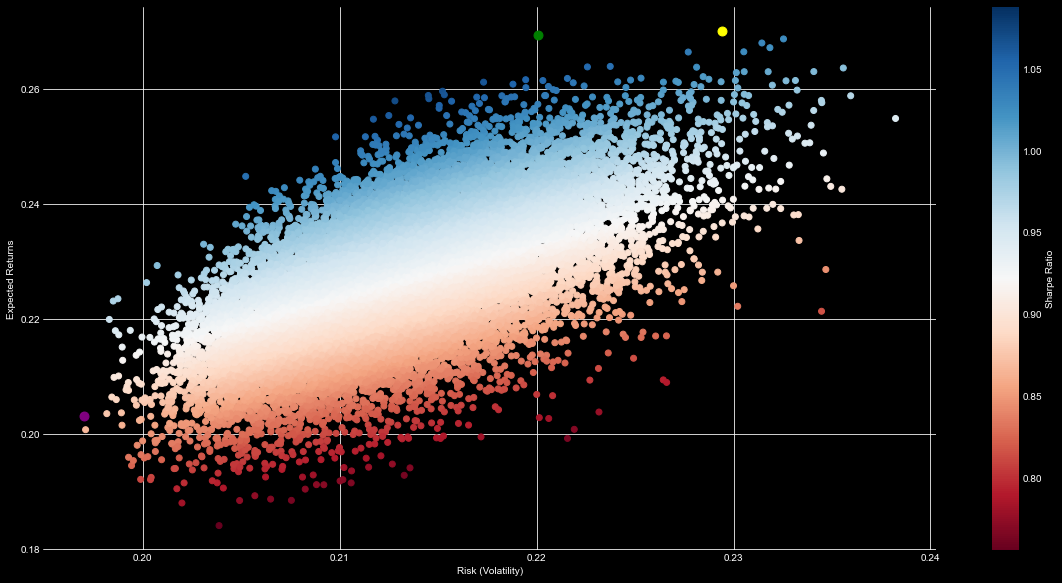

In [27]:
# creating a scatter plot and pinpointing the location of the above portfolios
plt.figure(figsize=(20,10))
plt.scatter(portfolios['Volatility'],portfolios['Return'],c=sharpe_arr,cmap='RdBu')#ret_arr,vol_arr
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Returns')

plt.scatter(optimal_risky_portfolio[1],optimal_risky_portfolio[0], c='green', s=80)
plt.scatter(min_vol_port[1],min_vol_port[0], c='purple', s=80)#
plt.scatter(max_er_port[1],max_er_port[0], c='yellow', s=80)
plt.style.use('dark_background')


Now that we know the weights of each portfolio, I'll Assign the weights to the stocks and check the cumulative returns of each of the portfolios

But, NOTE:
You’ve might have noticed from the observations produced by the simulation, the tangency portfolio has a lower sharp than my initial equal weight portfolio which now means based on ALL the observations I have, the EW portfolio is my tangency/Optimal  portfolio and i will treat it as my optimal portfolio going forward


In [28]:
#min volatility portfolio weights
min_vol_weights = all_weights[11365,:]
min_vol_weights

array([0.01965327, 0.02892659, 0.0727206 , 0.08481664, 0.03407417,
       0.00574669, 0.10273403, 0.01542162, 0.08259965, 0.02677539,
       0.07244427, 0.00035018, 0.02270644, 0.008453  , 0.00306983,
       0.09991149, 0.10203855, 0.06848453, 0.05649301, 0.09258005])

In [29]:
min_vol_port_return = returns.dot(min_vol_weights)
cum_minvol_returns =   (1 + min_vol_port_return).cumprod() - 1
cum_minvol_returns_perc = pd.Series(100 * cum_minvol_returns)

#Plot
fig = go.Figure([go.Scatter(x=dates['Date'], y=cum_minvol_returns_perc)])
fig.update_layout(template = "plotly_dark", title = 'Cummulative % Return of the minimum variance portfolio') 
fig.show()

In [30]:
#max volatility portfolio weights
max_er_weights = all_weights[514,:]
max_er_weights

array([0.01405334, 0.02601454, 0.03742182, 0.0013517 , 0.12345495,
       0.09940319, 0.0908398 , 0.11761733, 0.01473719, 0.00599165,
       0.03485385, 0.01902056, 0.06321792, 0.03607694, 0.115363  ,
       0.03208892, 0.01104056, 0.00568793, 0.03627828, 0.11548654])

In [31]:
max_er_port_return = returns.dot(max_er_weights)
cum_maxer_returns =   (1 + max_er_port_return).cumprod() - 1
cum_maxer_returns_perc = pd.Series(100 * cum_maxer_returns)

#Plot
fig = go.Figure([go.Scatter(x=dates['Date'], y=cum_maxer_returns_perc)])
fig.update_layout(template = "plotly_dark", title = 'Cummulative % Return of the maximum expected return portfolio') 
fig.show()

### Portfolio vs benchmarks:
It’s time to compare the all the portfolios against certain benchmarks which are going to be the Invesco QQQ fund which is a technology ETF, I chose this particular tech ETF as a benchmark because it has the highest NAV of 135 billion as of April 2022

I'll also include the NASDAQ composite as a benchmark as it is widely followed and considered as a benchmark by investors, the Nasdaq composite is even more relevant here because more than 50% of the stocks in the index are technology companies


In [32]:
#Importing the benchmarks data
QQQ = pd.DataFrame(yf.download('QQQ', start="2012-05-20", end="2021-12-31", index_col = 'Date', parse_dates=True)['Adj Close']) 
NASDAQ = pd.DataFrame(yf.download('^IXIC', start="2012-05-20", end="2021-12-31", index_col = 'Date', parse_dates=True)['Adj Close']) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
#calculate daily return, cumm return for each bechmark and place them in their data frames
for funds in (QQQ,NASDAQ):
    funds['Daily Return'] = funds.pct_change(1).dropna()
    funds['Cumulative Return'] = (1 + funds['Daily Return']).cumprod() - 1
    funds['Cumulative % Return'] = funds['Cumulative Return'] * 100

#creating a data frame that has all the portfolios and benchmarks cummulative % return
data = {'QQQ':QQQ['Cumulative % Return'],
       'NASDAQ':NASDAQ['Cumulative % Return'],
       'Optimal Port':cum_equal_returns_perc,
       'Min Variance':cum_minvol_returns_perc,
       'Max ER Port':cum_maxer_returns_perc}
funds_cumm = pd.DataFrame(data)
funds_cumm.reset_index(drop=True, inplace=True)
funds_cumm.insert(loc=0, column="Dates", value=dates)
funds_cumm.tail()

,Dates,QQQ,NASDAQ,Optimal Port,Min Variance,Max ER Port
2415,2021-12-23,598.161759,449.779269,1057.179319,760.450604,1721.950920
2416,2021-12-27,609.700479,457.432012,1079.205876,771.267908,1770.479314
2417,2021-12-28,606.411165,454.287177,1074.233304,769.651080,1758.200033
2418,2021-12-29,606.305663,453.742785,1070.900754,768.863245,1749.084313
2419,2021-12-30,604.194927,452.876668,1065.927119,766.206633,1736.803316


Both benchmarks performed poorly compared to the portfolios but this is largely due to concentration, as the portfolios have only 20 stocks while the benchmarks usually have hundreds of stocks in them, but the portfolio's strongest point is also its weakest as a concentrated portfolio will probably have a much larger drawdown even during corrections let alone recessions


The max expected return portfolio outperformed all the other portfolios and the benchmarks as expected 

While my initial EW portfolio now turned into my tangency optimal portfolio faired well by beating both the benchmarks by a mile!

In [34]:
fig = px.line(funds_cumm, x="Dates", y=funds_cumm.columns,
              hover_data={"Dates": "|%B %d, %Y"},
              title='Commulative % Return')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(template = "plotly_dark", title = '10 years Cummulative % Return of all tech portfolios and benchmarks')
fig.show()

### Conclusion:

Assuming I started with a 5000 in 2012 and invested in the ideal two best portfolios Max return portfolio and Optimal portfolio, by comparison, how much would my investment be by the end of 2021? (without rebalancing)

The max expected return portfolio seems to have a better outcome and seems very attractive especially considering the Sharpe ratio difference isn't that big but this portfolio was picked because of its high expected return unfortunately, it's not practical due to the presence of large estimation errors in those expected return estimate. As I have estimated them using historical data and have assumed past performance will be the same in the future which is unlikely as businesses change ESPECIALLY in the ever-changing technology industry

Hence the more reliable portfolio based on this research would either be the min vol or EW/Tangency portfolio  


In [35]:
Initial_Investment = 5000


#Minimum Variance
Min_ASRr = str(round(portfolios['Sharpe Ratio'][11365],2))
Min_AERr = str(round(portfolios['Return'][11365]* 100,2)) + '%' 
Min_ASTDr = str(round(portfolios['Volatility'].min()*100,2)) + '%'
cumm = str(round(cum_minvol_returns_perc[2418],2)) + '%'
EW_Value = Initial_Investment * (cum_minvol_returns_perc[2418]/100)
Absolute_Value = '$' + str(round(EW_Value,2))
print('THE MINIMUM VARIANCE PORTFOLIO:')
print(f'The annual sharpe ratio of the minimum variance portfolio is {Min_ASRr}')
print(f'The annual Volatility of the minimum variance portfolio is {Min_ASTDr}')
print(f'The annual Expected Return of the minimum variance portfolio is {Min_AERr}')
print(f'The 10 yr cummulative return of the minimum variance portfolio is {cumm}')
print(f'A ${Initial_Investment} investment in minimum variance portfolio in 2012 would be worth {Absolute_Value} by the end of 2021')

#Tangency/Optimal Portfolio
ASRr = str(round(SR,2))
AERr = str(round(AER* 100,2)) + '%' 
ASTDr = str(round(ASTD*100,2)) + '%'
cumm3 = str(round(cum_equal_returns_perc[2418],2)) + '%'
EW_Value3 = Initial_Investment * (cum_equal_returns_perc[2418]/100)
Absolute_Value3 = '$' + str(round(EW_Value3,2))
print('\nTHE OPTIMAL PORTFOLIO:')
print(f'The annual sharpe ratio of the optimal portfolio is {ASRr}')
print(f'The annual Volatility of the optimal portfolio is {ASTDr}')
print(f'The annual Expected Return of the optimal portfolio is {AERr}')
print(f'The 10 yr cummulative return of the optimal portfolio is {cumm3}')
print(f'A ${Initial_Investment} investment in the optimal portfolio in 2012 would be worth {Absolute_Value3} by the end of 2021')


THE MINIMUM VARIANCE PORTFOLIO:
The annual sharpe ratio of the minimum variance portfolio is 0.88
The annual Volatility of the minimum variance portfolio is 19.7%
The annual Expected Return of the minimum variance portfolio is 20.32%
The 10 yr cummulative return of the minimum variance portfolio is 766.21%
A $5000 investment in minimum variance portfolio in 2012 would be worth $38310.33 by the end of 2021

THE OPTIMAL PORTFOLIO:
The annual sharpe ratio of the optimal portfolio is 1.17
The annual Volatility of the optimal portfolio is 21.15%
The annual Expected Return of the optimal portfolio is 27.84%
The 10 yr cummulative return of the optimal portfolio is 1065.93%
A $5000 investment in the optimal portfolio in 2012 would be worth $53296.36 by the end of 2021
